# **Modelowanie rezerwacji w hotelu**

Gdy perspektywie najbliższych kilku godzin jest -10°C na termometrze, głowa sama zaczyna przenosić się do cieplejszych miejsc. Dzięki stronom oraz aplikacjom, rezerwację pokoju w hotelu na drugim końcu świata można praktycznie załatwić w kilka minut. Spora część hoteli, żeby zwabić więcej turystów, oferuje darmowe odwołanie. Jeśli więc się rozmyślimy lub nasze plany ulegną zmianie, nic nie tracimy. Dla hotelu jednak to sytuacja niezbyt pożądana oraz oznacza utratę zarobku, jeśli pokój pozostanie wolny. Czy jesteśmy w stanie przewidzieć, który klient zamelduje się, a który odwoła swój pobyt?
 
Aby odpowiedzieć na to pytanie, poddam analizie dane z zestawu **Hotel Reservations Dataset** (źródło: [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)). Zestaw ten zawiera jedną tabelę przedstawiającą ponad 30 tysięcy różnych rezerwacji w hotelu na przestrzeni 2017 i 2018 roku.

# Opisy kolumn

W tabeli jest 19 atrybutów, w tym Booking_ID, czyli unikalny identyfikator rezerwacji oraz booking_status, czyli status rezerwacji. 

Poniżej opis wszystkich atrybutów:

- `Booking_ID`: unikalny identifykator rezerwacji
- `no_of_adults`: liczba osób dorosłych
- `no_of_children`: liczba dzieci
- `no_of_weekend_nights`: liczba nocy weekendowych (sobót i niedziel) na rezerwacji
- `no_of_week_nights`: liczba nocy w tygodniu (od poniedziałku do piątku) na rezerwacji
- `type_of_meal_plan`: rodzaj diety
- `required_car_parking_space`: miejsce parkingowe (0 - nie, 1 - tak)
- `room_type_reserved`: rodzaj pokoju
- `lead_time`: liczba dni pomiędzy dokonaniem rezerwacji, a początkiem pobytu
- `arrival_year`: rok pobytu
- `arrival_month`: miesiąc pobytu
- `arrival_date`: dzień pobytu
- `market_segment_type`: Grupa konsumencka
- `repeated_guest`: powracający gość (0 - nie, 1 - tak)
- `no_of_previous_cancellations`: liczba poprzednich anulacji przez osobę rezerwującą
- `no_of_previous_bookings_not_canceled`: liczba wcześniejszych rezerwacji, które nie zostały anulowane przez osobę rezerwującą
- `avg_price_per_room`: średnia cena dnia pobytu podczas rezerwacji w euro (ceny pokojów są dynamiczne)
- `no_of_special_requests`: liczba specjalnych życzeń/potrzeb
- `booking_status`: status rezerwacji


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reservations = pd.read_csv("data/raw.csv")
reservations.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Zestaw zawiera dokładnie 36275 wierszy z danymi oraz żadnych brakujących danych.

In [3]:
reservations.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [4]:
reservations.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [16]:
# Ustawienia dla wykresów

import matplotlib as mpl

sns.set_style("whitegrid")
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9 
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['savefig.bbox'] = "tight"
mpl.rcParams['savefig.pad_inches'] = 0.2

### Status rezerwacji oraz koszt
Cecha, która u mnie zawsze jako pierwsza znajduje się pod lupą to cecha z etykietami, w tym przypadku ze statusem rezerwacji. Jest ona binarna i przyjmuje dwie wartości - `Not_Cancelled` (nieanulowana) oraz `Cancelled` (anulowana). Na pierwszy rzut oka widać, że rezerwacji, które zostały anulowane jest prawie razy mniej. Rezerwacje, które doszły do skutku stanowią ponad 67% obserwacji w zbiorze, a zatem nie jest zbiór zbalansowany. Nim przystąpię do modelowania, spróbuję zbalansować ten zbiór poprzez syntetyczne nadpróbkowanie (ang. *oversampling*)

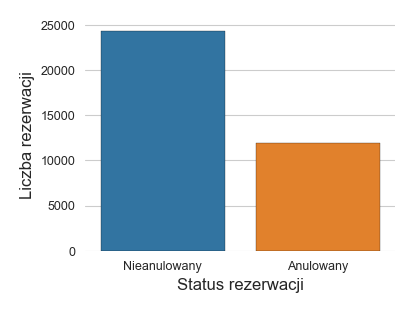

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.countplot(data=reservations, x='booking_status', edgecolor='black', linewidth=0.2)
ax.set_xlabel("Status rezerwacji")
ax.set_ylabel("Liczba rezerwacji")
ax.set_xticklabels(['Nieanulowany', 'Anulowany'])
sns.despine(left=True, bottom=True)
plt.savefig("booking_status.png")

In [7]:
percent_not_cancelled = round(len(reservations[reservations['booking_status'] == 'Not_Canceled'])/len(reservations)*100, 1)
percent_not_cancelled

67.2

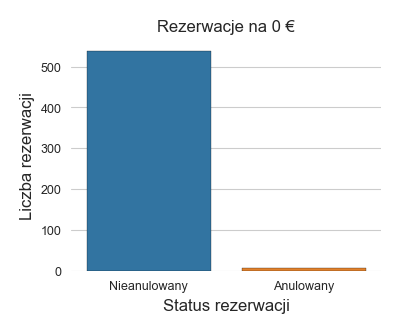

In [8]:
reservations_0_euro = reservations[reservations['avg_price_per_room'] == 0]

fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(data=reservations_0_euro, x='booking_status', edgecolor='black', linewidth=0.2)
ax.set_xlabel("Status rezerwacji")
ax.set_ylabel("Liczba rezerwacji")
ax.set_title("Rezerwacje na 0 €")
ax.set_xticklabels(['Nieanulowany', 'Anulowany'])
sns.despine(left=True, bottom=True)
plt.savefig("booking_status_when_price_zero.png")


In [9]:
reservations_0_euro.groupby('market_segment_type')['market_segment_type'].count()

market_segment_type
Complementary    354
Online           191
Name: market_segment_type, dtype: int64

W obu przypadkach, mediana ceny pokoju za dzień to około 100 euro. Jest wiele wartości, które oznaczone są jako wartości odstające według wykresu pudełkowego. Biorąc pod uwagę, że ceny są ustalane dynamicznie i przy największym zainteresowaniu cena może wzrastać nawet kilkukrotnie, nie będę zajmował się wartościami powyżej mediany. Moją uwagę przykuły wartości bliskie zeru, a właściwie jemu równe. Czy to może być błąd w danych?

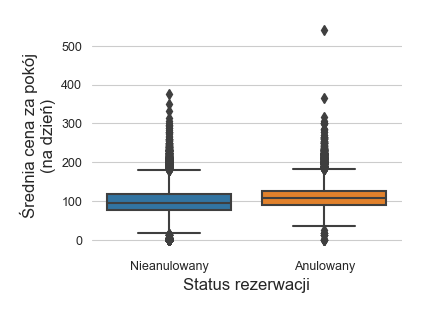

In [10]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.boxplot(data=reservations, x="booking_status", y="avg_price_per_room")
ax.set_xlabel("Status rezerwacji")
ax.set_ylabel("Średnia cena za pokój\n(na dzień)")
ax.set_xticklabels(['Nieanulowany', 'Anulowany'])
sns.despine(left=True, bottom=True)
plt.savefig("avg_price.png")

### Kto przyjeżdża do hotelu?
Spójrzmy teraz na dane, kto najczęściej rezerwuje pokoje w tym hotelu. Większość gości lub potencjalnych gości hotelu stanowią pary dorosłych bez dzieci. Z ciekawszych obserwacji - są rezerwacje które mają tylko dzieci, oraz rezerwacje, które mają 9 lub 10 dzieci.&nbsp;

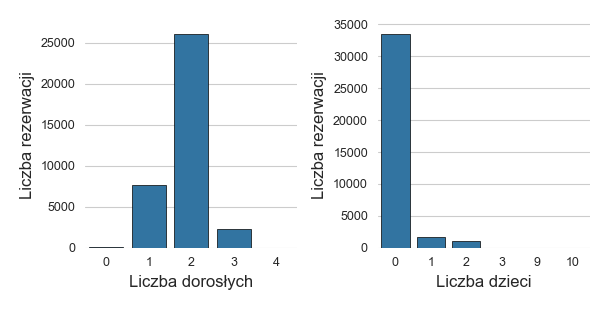

In [11]:
BLUE = [sns.color_palette()[0]]

fig, ax = plt.subplots(1, 2, figsize=(6, 3))
sns.countplot(ax=ax[0], data=reservations, x='no_of_adults', palette=BLUE, edgecolor='black', linewidth=0.5)
sns.countplot(ax=ax[1], data=reservations, x='no_of_children',  palette=BLUE, edgecolor='black', linewidth=0.5)
ax[0].set_xlabel("Liczba dorosłych")
ax[1].set_xlabel("Liczba dzieci")

for i in range(len(ax)):
    ax[i].set_ylabel("Liczba rezerwacji")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("adults_children.png")
plt.show()

In [12]:
reservations[(reservations['no_of_children'] == 0) & (reservations['no_of_adults'] == 2)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [13]:
reservations[reservations['no_of_children'] > 2]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5657,INN05658,2,3,0,1,Meal Plan 1,0,Room_Type 6,17,2017,8,29,Online,0,0,0,153.00,2,Not_Canceled
6338,INN06339,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled
10041,INN10042,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.00,0,Not_Canceled
10061,INN10062,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.50,1,Canceled
11530,INN11531,2,3,0,2,Meal Plan 1,0,Room_Type 7,114,2018,8,2,Online,0,0,0,266.30,0,Canceled
13297,INN13298,2,3,0,2,Meal Plan 1,0,Room_Type 7,15,2017,12,17,Complementary,0,0,0,0.00,0,Not_Canceled
16030,INN16031,2,3,0,1,Meal Plan 1,0,Room_Type 2,4,2017,12,11,Complementary,0,0,0,0.00,0,Not_Canceled
17532,INN17533,2,3,2,0,Meal Plan 1,0,Room_Type 6,0,2017,8,9,Online,0,0,0,153.00,0,Not_Canceled
18734,INN18735,0,3,0,3,Meal Plan 1,0,Room_Type 2,14,2018,6,9,Online,0,0,0,116.49,2,Not_Canceled
20796,INN20797,0,3,1,4,Meal Plan 2,0,Room_Type 1,197,2018,12,21,Offline,0,0,0,43.80,0,Not_Canceled


In [14]:
reservations[reservations['no_of_adults'] == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
287,INN00288,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38,1,Canceled
653,INN00654,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68,1,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
954,INN00955,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50,2,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,INN34721,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,2018,9,21,Online,0,0,0,127.38,3,Not_Canceled
34730,INN34731,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,2018,8,27,Online,0,0,0,88.77,0,Canceled
34890,INN34891,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,2018,9,16,Online,0,0,0,124.25,2,Not_Canceled
35691,INN35692,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,2018,3,19,Online,0,0,0,78.00,0,Canceled


### Długość pobytu
Analizując rozkład długości pobytu podczas rezerwacji dochodzimy do wniosku, że dla obu statusów rezerwacji wygląda on bardzo podobnie. Dominują pobyty od 1 do 4 dni, z średnio 3 dniami w tygodniu. Połowa prawie rezerwacji to pobyty bez dni weekendowych.&nbsp;

In [15]:
reservations_mod = reservations.copy()
reservations_mod['total_length'] = reservations_mod['no_of_weekend_nights'] + reservations_mod['no_of_week_nights']
reservations_mod.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_length
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2


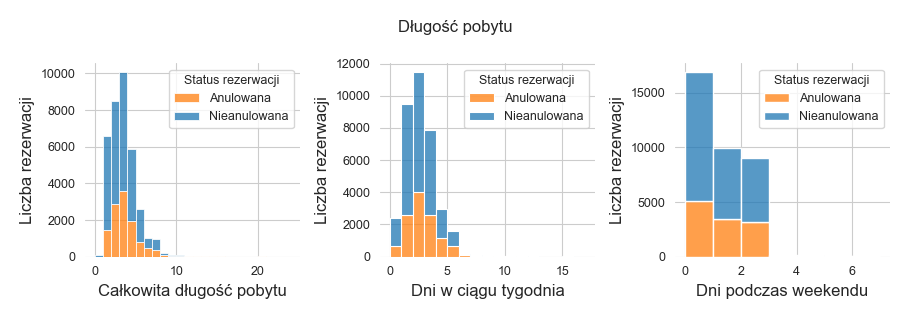

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))

sns.histplot(ax=ax[0], data=reservations_mod, x='total_length', hue='booking_status', multiple="stack", binwidth=1)
sns.histplot(ax=ax[1], data=reservations_mod, x='no_of_week_nights', hue='booking_status', multiple="stack", binwidth=1)
sns.histplot(ax=ax[2], data=reservations_mod, x='no_of_weekend_nights', hue='booking_status', multiple="stack", binwidth=1)

ax[0].set_xlabel("Całkowita długość pobytu")
ax[1].set_xlabel("Dni w ciągu tygodnia")
ax[2].set_xlabel("Dni podczas weekendu")

for i in range(len(ax)):
    ax[i].set_ylabel("Liczba rezerwacji")
    ax[i].tick_params(axis='both', which='major', labelsize=9)
    ax[i].legend(title='Status rezerwacji', loc='upper right', labels=['Anulowana', 'Nieanulowana'], fontsize=9, title_fontsize=9)
    
plt.suptitle("Długość pobytu")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("length_stay.png")

### Czas między rezerwacją, a zameldowaniem
Zestaw danych zawiera również zmienną, która określa liczbę dni pomiędzy dniem, kiedy rezerwacja została złożona, a pierwszym dniem pobytu. Okazuje się, że mediana tej zmiennej dla rezerwacji, które zostały anulowane to 122 dni, a dla tych, które doszły do skutku to 39 dni. Rezerwacje, które są robione z większych wyprzedzeniem, mają większą szansę, aby zostać anulowane. Myślę, że to będzie jedna z ważniejszych zmiennych podczas modelowania.&nbsp;

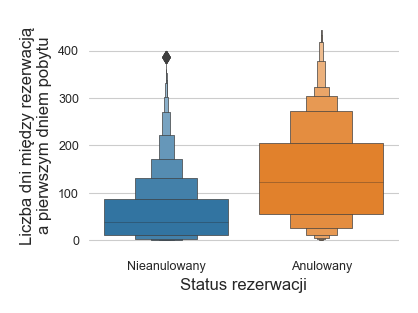

In [17]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.set_style("whitegrid")
sns.boxenplot(data=reservations, y='lead_time', x='booking_status', linewidth=0.5)
plt.xlabel("Status rezerwacji")
plt.ylabel("Liczba dni między rezerwacją\na pierwszym dniem pobytu")
ax.set_xticklabels(['Nieanulowany', 'Anulowany'])
sns.despine(left=True, bottom=True)
plt.savefig("lead_time.png")
plt.show()

In [18]:
reservations.groupby('booking_status')['lead_time'].agg('median')

booking_status
Canceled        122.0
Not_Canceled     39.0
Name: lead_time, dtype: float64

### Rodzaj pokoju oraz dieta
Głównymi rodzajami pokojów rezerwowanych przez gości hotelu są rodzaje 1 oraz 4. Najczęściej wybieranym rodzajem diety jest dieta oznaczona jako Meal Plan 1. Niestety opis zestawu nie doprecyzowuje dokładnie, co wszystkie wartości oznaczają.&nbsp;

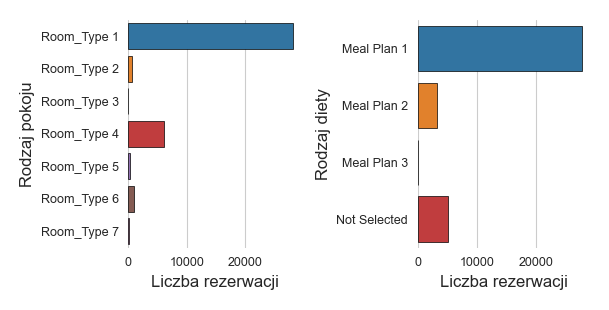

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ROOM_ORDER = sorted(list(reservations['room_type_reserved'].unique()), key=lambda x: x.split(" ")[-1])
MEAL_ORDER = sorted(list(reservations['type_of_meal_plan'].unique()), key=lambda x: x.split(" ")[-1])

sns.countplot(ax=ax[0], data=reservations, y='room_type_reserved', order=ROOM_ORDER, edgecolor='black', linewidth=0.5)
sns.countplot(ax=ax[1], data=reservations, y='type_of_meal_plan', order=MEAL_ORDER, edgecolor='black', linewidth=0.5)

ax[0].set_ylabel("Rodzaj pokoju")
ax[1].set_ylabel("Rodzaj diety")

for i in range(len(ax)):
    ax[i].set_xlabel("Liczba rezerwacji")
    
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("room_and_diet.png")


### Ponowna rezerwacja oraz parking
Dane pokazują, że niewielu gości była to ponowna rezerwacja oraz tak samo mało gości potrzebuje miejsce parkingowe w hotelu.&nbsp;

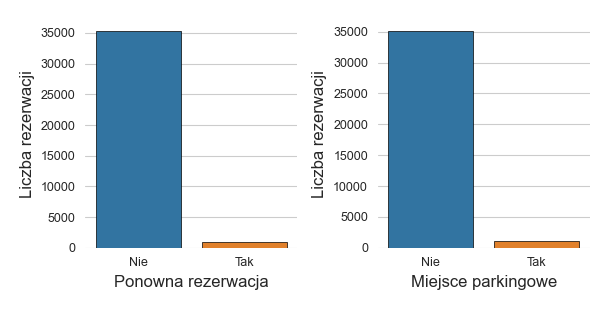

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

sns.countplot(ax=ax[0], data=reservations, x='repeated_guest', edgecolor='black', linewidth=0.5)
sns.countplot(ax=ax[1], data=reservations, x='required_car_parking_space', edgecolor='black', linewidth=0.5)

ax[0].set_xlabel("Ponowna rezerwacja")
ax[1].set_xlabel("Miejsce parkingowe")

for i in range(len(ax)):
    ax[i].set_ylabel("Liczba rezerwacji")
    ax[i].set_xticklabels(['Nie', 'Tak'])

sns.despine(left=True, bottom=True)
# plt.suptitle("Kto najczęściej rezerwuje pokoje w tym hotelu?")
plt.tight_layout()
plt.savefig("repeated_parking.png", dpi=200, bbox_inches="tight", pad_inches=0.2)
plt.show()

### Data przyjazdu
Weźmy pod lupę teraz datę, na którą została zrobiona rezerwacja. W okresie letnim, czyli od czerwca do sierpnia, ponad 40% rezerwacji zostało odwołanych. Za to najmniej odwołanych rezerwacji było na przełomie roku, czyli grudniu oraz styczniu.&nbsp;

Ponieważ do dyspozycji mamy datę przyjazdu, chciałem otrzymać dzień tygodnia, który odpowiada tej dacie. Ku mojemu zdziwieniu, okazało się, że zawiera ona 29 lutego 2018, czyli dzień, którego nie było. Co prawda to tylko 37 obserwacji, które jednak usunę na potrzeby modelowania.  

In [21]:
reservations[((reservations['arrival_month'] == 2) & (reservations['arrival_date'] == 29))]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,2018,2,29,Online,1,1,0,61.43,0,Canceled
3677,INN03678,1,0,1,3,Meal Plan 1,0,Room_Type 1,21,2018,2,29,Online,0,0,0,102.05,0,Canceled
5600,INN05601,2,0,1,3,Meal Plan 1,0,Room_Type 1,24,2018,2,29,Offline,0,0,0,45.50,0,Not_Canceled
6343,INN06344,1,0,1,1,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled
7648,INN07649,2,1,1,5,Meal Plan 1,0,Room_Type 1,35,2018,2,29,Online,0,0,0,98.10,1,Canceled
8000,INN08001,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,183.00,1,Not_Canceled
8989,INN08990,1,0,1,2,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled
9153,INN09154,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,189.75,0,Not_Canceled
9245,INN09246,2,0,1,3,Meal Plan 1,0,Room_Type 4,15,2018,2,29,Online,0,0,0,85.55,1,Not_Canceled
9664,INN09665,1,0,1,0,Meal Plan 1,0,Room_Type 4,21,2018,2,29,Online,0,0,0,117.00,0,Not_Canceled


In [12]:
import calendar

reservations_filtered = reservations[~((reservations['arrival_month'] == 2) & (reservations['arrival_date'] == 29))]
reservations_filtered['weekday'] = reservations_filtered.apply(lambda x: calendar.weekday(x['arrival_year'], x['arrival_month'], x['arrival_date']), axis=1)

C:\Users\bartl\AppData\Local\Temp\ipykernel_28284\3927327979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reservations_filtered['weekday'] = reservations_filtered.apply(lambda x: calendar.weekday(x['arrival_year'], x['arrival_month'], x['arrival_date']), axis=1)


In [13]:
g = reservations_filtered.groupby(['arrival_month', 'booking_status'])['arrival_month'].count().unstack()
g['percent_cancelled'] = round(g['Canceled']/(g['Canceled'] + g['Not_Canceled']) * 100, 2)
g

booking_status,Canceled,Not_Canceled,percent_cancelled
arrival_month,,,
1,24,990,2.37
2,423,1244,25.37
3,700,1658,29.69
4,995,1741,36.37
5,948,1650,36.49
6,1291,1912,40.31
7,1314,1606,45.00
8,1488,2325,39.02
9,1538,3073,33.36


In [23]:
g = reservations_filtered.groupby(['arrival_month', 'booking_status'])['arrival_month'].count().unstack()
g['percent_cancelled'] = round(g['Canceled']/(g['Canceled'] + g['Not_Canceled']) * 100, 2)
g

booking_status,Canceled,Not_Canceled,percent_cancelled
arrival_month,,,
1,24,990,2.37
2,423,1244,25.37
3,700,1658,29.69
4,995,1741,36.37
5,948,1650,36.49
6,1291,1912,40.31
7,1314,1606,45.00
8,1488,2325,39.02
9,1538,3073,33.36


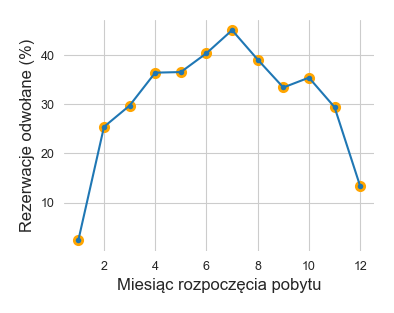

In [17]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.scatterplot(data=g, x='arrival_month', y='percent_cancelled', markers=True, edgecolor='orange', linewidth=2)
sns.lineplot(data=g, x='arrival_month', y='percent_cancelled', markers=True)

ax.set_xlabel("Miesiąc rozpoczęcia pobytu")
ax.set_ylabel("Rezerwacje odwołane (%)")

sns.despine(left=True, bottom=True)
# plt.savefig("arrival_month.png")